# **LABORATORY TASK 4**

**Monique Antoinette R. Mendoza**

**DS4A**


---

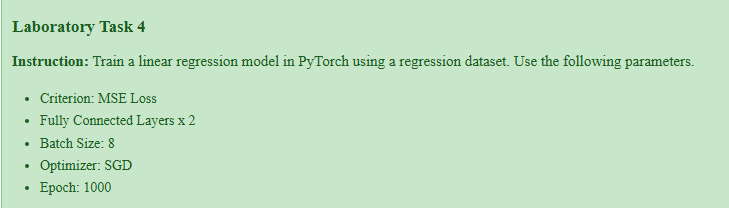

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

print("PyTorch version:", torch.__version__)

PyTorch version: 2.8.0+cu126


In [4]:
# Let's create a simple regression dataset (y = 3x + 2 + noise)
X = torch.linspace(0, 10, 100).view(-1, 1)
y = 3 * X + 2 + torch.randn(X.size()) * 0.5  # adding noise

# Create TensorDataset and DataLoader (Batch Size = 8)
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=8, shuffle=True)

In [12]:
# Define the Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)            # Activation (ReLU)
        x = self.fc2(x)
        return x

model = LinearRegressionModel()


In [13]:
# Define Loss and Optimizer
criterion = nn.MSELoss()               # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent


In [7]:
# Train the Model
epochs = 1000

for epoch in range(epochs):
    for batch_X, batch_y in loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 2.4770
Epoch [200/1000], Loss: 3.9731
Epoch [300/1000], Loss: 1.2677
Epoch [400/1000], Loss: 0.1744
Epoch [500/1000], Loss: 1.3761
Epoch [600/1000], Loss: 2.0831
Epoch [700/1000], Loss: 7.5864
Epoch [800/1000], Loss: 0.3930
Epoch [900/1000], Loss: 0.4985
Epoch [1000/1000], Loss: 1.3636


In [8]:
# Test the Model
test_X = torch.tensor([[4.0]])
predicted = model(test_X).item()
print(f"\nPredicted value for input 4.0: {predicted:.3f}")


Predicted value for input 4.0: 15.769


The result shows the loss values changed a lot during training, which shows that this model was adjusting its weights to find the best line that fits the data. At the start the loss was `2.477`, meaning the model’s predictions were still far from the correct answers. As the training went on, the loss sometimes went down and sometimes went up again, showing that the model was still trying to balance and learn the right pattern.

By the end of the 1000 epochs, the loss became **`1.3636`**, which means the model improved compared to the beginning but could still be better. When I tested it with `x = 4.0`, the model predicted **`15.769`** which is close to the real answer of **`14`** based on `y = 3x + 2`. This means this model learned the general relationship between x and y, even though the loss didn’t decrease smoothly.